#Project Title: Understanding SVD Through Image Compression

#The purpose of this notebook is to demonstrate how SVD compresses grayscale images by reconstructing them with fewer singular values to reduce data size while preserving visual quality.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#1.Importing Libraries

In [4]:
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd


#2.Matrix Decomposition and apply SVD

In [5]:
X = np.array([[3, 3, 2], [2, 3, -2]])
U, singular, V_transpose = svd(X)


#3.Inverse SVD Reconstruction

In [6]:
singular_inv = 1.0 / singular
s_inv = np.zeros(X.shape)
s_inv[0][0] = singular_inv[0]
s_inv[1][1] = singular_inv[1]
M = np.dot(np.dot(V_transpose.T, s_inv.T), U.T)


In [8]:
M        # reconstructed inverse of X

array([[ 0.11462451,  0.04347826],
       [ 0.07114625,  0.13043478],
       [ 0.22134387, -0.26086957]])

#4.Load and Display Original Image

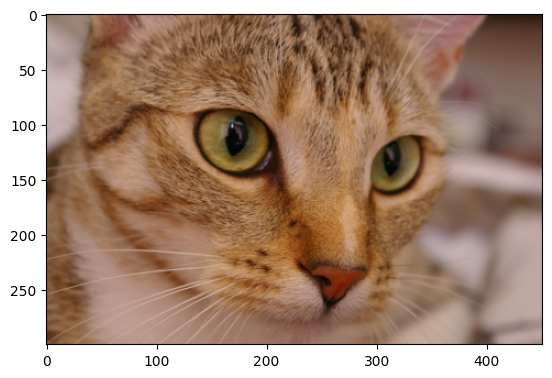

In [10]:
cat = data.chelsea()                 #Chelsea cat image, original RGB Image
plt.imshow(cat)


#5.Convert to Grayscale

In [12]:
gray_cat = rgb2gray(cat)
gray_cat

array([[0.48523098, 0.48523098, 0.47738784, ..., 0.11692392, 0.11692392,
        0.11692392],
       [0.49699569, 0.49307412, 0.48523098, ..., 0.12336824, 0.1225349 ,
        0.1272898 ],
       [0.50849255, 0.50457098, 0.49475569, ..., 0.12336039, 0.12728196,
        0.13120353],
       ...,
       [0.24786745, 0.29884784, 0.40501294, ..., 0.58914824, 0.58914824,
        0.58914824],
       [0.38173647, 0.42487373, 0.39628392, ..., 0.57403529, 0.57403529,
        0.57795686],
       [0.42487373, 0.36883294, 0.36042431, ..., 0.55442745, 0.55442745,
        0.55834902]])

#6.Apply SVD to Grayscale Image

In [14]:
U, S, V_T = svd(gray_cat, full_matrices=False)
S = np.diag(S)          #Converts the singular values into a diagonal matrix S
S

array([[1.70427845e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.16412563e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.73935477e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.29343946e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.28706468e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.15307518e-02]])

#7.Image Compression and Visualization

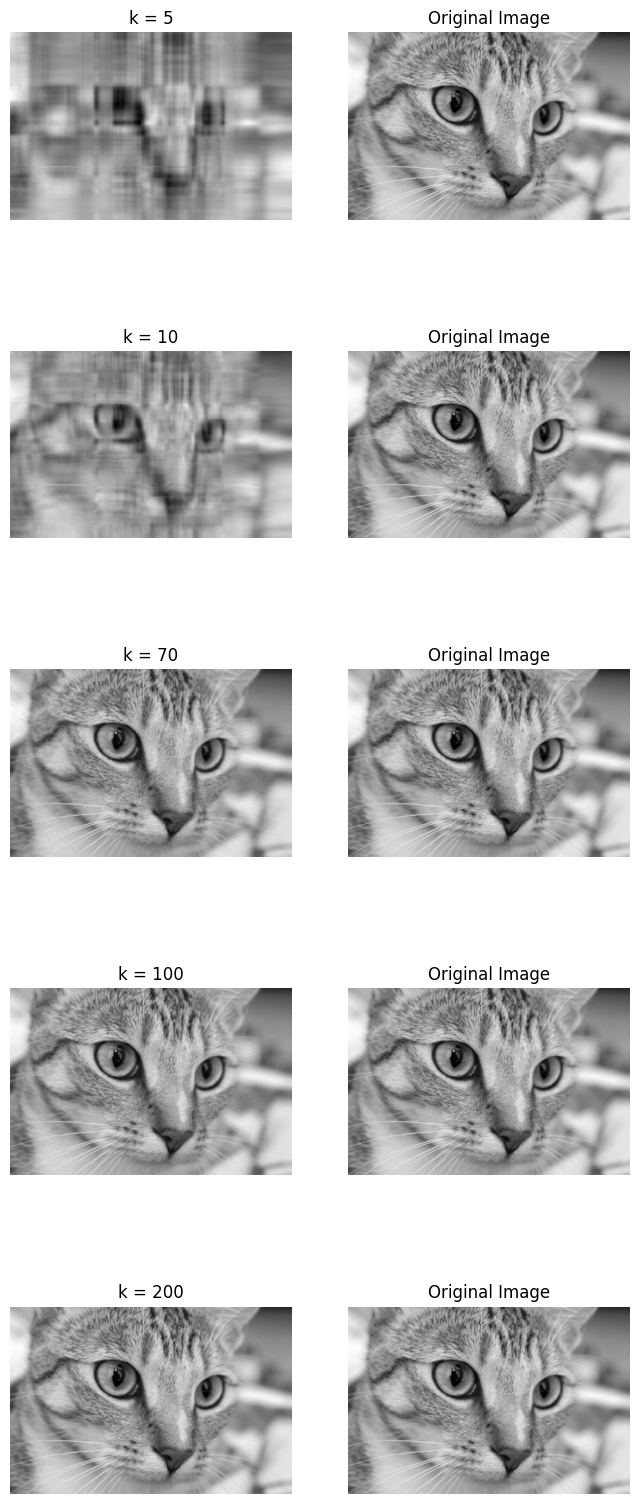

In [15]:
fig, ax = plt.subplots(5, 2, figsize=(8, 20))
curr_fig = 0
for r in [5, 10, 70, 100, 200]:
    cat_approx = U[:, :r] @ S[:r, :r] @ V_T[:r, :]
    ax[curr_fig][0].imshow(cat_approx, cmap='gray')
    ax[curr_fig][0].set_title("k = " + str(r))
    ax[curr_fig][0].axis('off')

    ax[curr_fig][1].imshow(gray_cat, cmap='gray')
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].axis('off')

    curr_fig += 1
plt.show()


#Key Insight

SVD allows you to compress images by keeping only the most important features (singular values), reducing storage while preserving visual quality.

#Combine all steps in single code block

[[ 3  3  2]
 [ 2  3 -2]]
U:  [[-0.7815437 -0.6238505]
 [-0.6238505  0.7815437]]
Singular array [5.54801894 2.86696457]
V^{T} [[-0.64749817 -0.7599438  -0.05684667]
 [-0.10759258  0.16501062 -0.9804057 ]
 [-0.75443354  0.62869461  0.18860838]]
[[ 0.11462451  0.04347826]
 [ 0.07114625  0.13043478]
 [ 0.22134387 -0.26086957]]


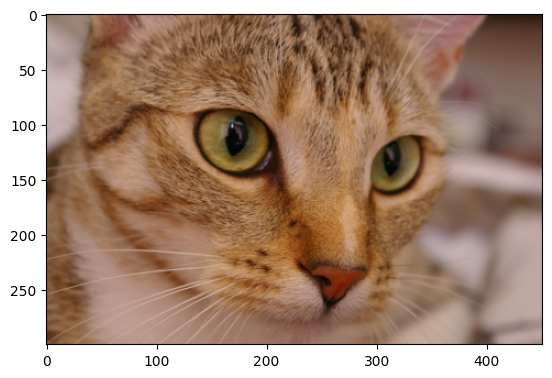

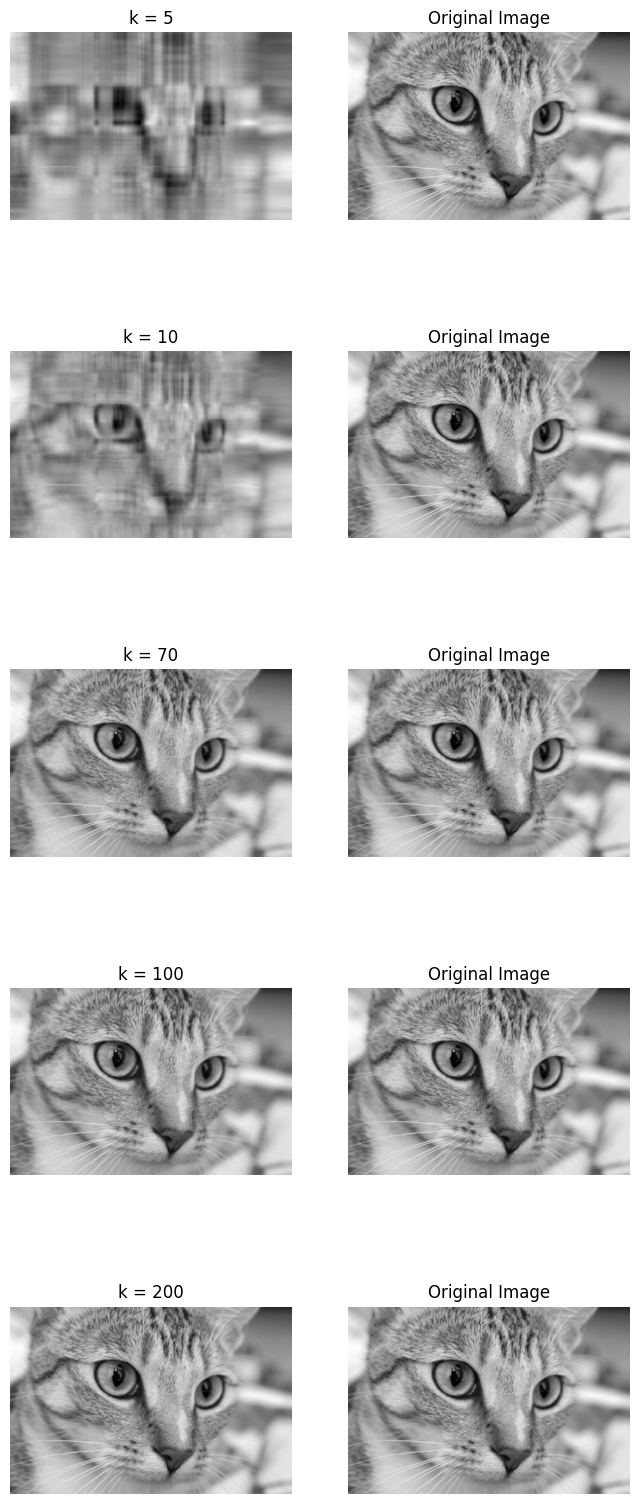

In [2]:
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd


X = np.array([[3, 3, 2], [2, 3, -2]])
print(X)

U, singular, V_transpose = svd(X)

print("U: ", U)
print("Singular array", singular)
print("V^{T}", V_transpose)

singular_inv = 1.0 / singular
s_inv = np.zeros(X.shape)
s_inv[0][0] = singular_inv[0]
s_inv[1][1] = singular_inv[1]
M = np.dot(np.dot(V_transpose.T, s_inv.T), U.T)
print(M)


cat = data.chelsea()
plt.imshow(cat)

gray_cat = rgb2gray(cat)

U, S, V_T = svd(gray_cat, full_matrices=False)
S = np.diag(S)
fig, ax = plt.subplots(5, 2, figsize=(8, 20))

curr_fig = 0
for r in [5, 10, 70, 100, 200]:
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    ax[curr_fig][0].imshow(cat_approx, cmap='gray')
    ax[curr_fig][0].set_title("k = " + str(r))
    ax[curr_fig, 0].axis('off')
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(gray_cat, cmap='gray')
    ax[curr_fig, 1].axis('off')
    curr_fig += 1
plt.show()

#Summary:This notebook demonstrates image compression using Singular Value Decomposition (SVD) by reconstructing a grayscale image with varying numbers of singular values. It visualizes how retaining fewer components reduces data size while preserving essential visual features.